# R programming - Assignment

https://colab.research.google.com/github/pehal6/Mini-Project-8/blob/main/R%20programming




### Q1 Create a file that contains 1000 lines of random strings.

In [4]:
# Generate 1000 random strings of length 8
random_strings <- replicate(1000, paste0(sample(letters, 8, replace = TRUE), collapse = ""))

writeLines(random_strings, "random_strings.txt")


Q2 Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform the following operations:
(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number rows having missing values.
(ii) Replace all the NA values with the average of the column value.
(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns having correlation <=0.7.
(iv) Normalize all the values in the dataset between 0 and 10.
(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.

(i) Rows with missing values: 100 
(iii) Columns with correlation <= 0.7: V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30 

(v) Final Binary Data (first 5 rows):
  V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21
1  0  0  0  0  0  0  0  0  1   0   0   0   0   0   0   0   0   0   0   0   0
2  0  0  0  0  1  0  0  0  0   0   0   0   0   0   0   0   1   0   0   0   0
3  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
4  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   0   0   0   0   0   0
5  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   1   0   0   1   0   0
  V22 V23 V24 V25 V26 V27 V28 V29 V30
1   0   0   0   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0
4   0   0   0   0   0   0   0   1   0
5   0   0   0   0   0   0   0   1   0


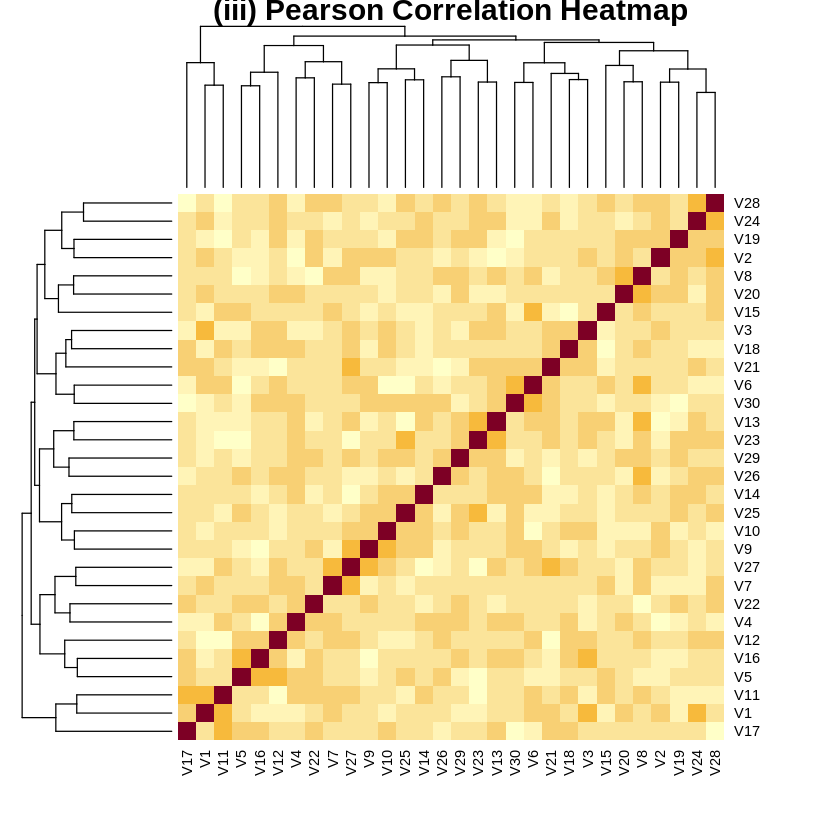

In [ ]:
set.seed(1)
df <- as.data.frame(matrix(sample(1:200, 100 * 30, replace = TRUE), nrow = 100))

# (i) Replace values between 10 and 60 with NA
df[df >= 10 & df <= 60] <- NA

# Count number of rows having any NA
rows_with_na <- sum(apply(df, 1, function(row) any(is.na(row))))
cat("(i) Rows with missing values:", rows_with_na, "\n")

# (ii) Replace NA with column mean
df <- as.data.frame(lapply(df, function(col) {
  col[is.na(col)] <- mean(col, na.rm = TRUE)
  return(col)
}))

# (iii) Pearson correlation and heatmap
cor_matrix <- cor(df)

# Plot heatmap (basic)
heatmap(cor_matrix, main = "(iii) Pearson Correlation Heatmap")

# Select columns where all correlations with others are <= 0.7
selected_cols <- which(apply(cor_matrix, 2, function(x) all(abs(x[x != 1]) <= 0.7)))
cat("(iii) Columns with correlation <= 0.7:", paste(names(df)[selected_cols], collapse = ", "), "\n")

# (iv) Normalize values between 0 and 10
df_norm <- as.data.frame(lapply(df, function(col) {
  (col - min(col)) / (max(col) - min(col)) * 10
}))

# (v) Replace values: if <= 0.5 then 1 else 0
df_final <- as.data.frame(ifelse(df_norm <= 0.5, 1, 0))

# Show first 5 rows of final result
cat("\n(v) Final Binary Data (first 5 rows):\n")
print(head(df_final, 5))


Q3 Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100]. Perform the following operations:
(i) Plot scatter graph between Column 5 and Column 6.
(ii) Plot histogram of each column in single graph.
(iii) Plot the Box plot of each column in single graph.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



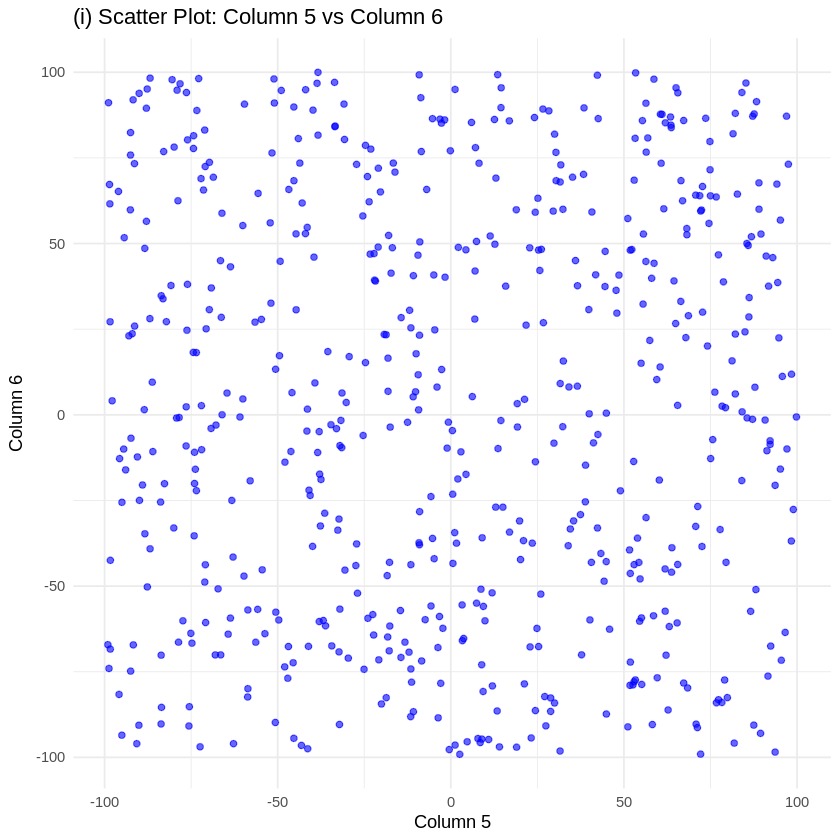

In [ ]:
# Load required libraries
install.packages("reshape2", repos = "http://cran.us.r-project.org")
install.packages("gridExtra", repos = "http://cran.us.r-project.org")
library(ggplot2)
library(reshape2)
library(gridExtra)

# Step 1: Generate the random dataset
set.seed(42)
df <- as.data.frame(matrix(runif(600 * 15, min = -100, max = 100), nrow = 600))

# Step 2: Rename columns for better plotting
colnames(df) <- paste0("V", 1:15)

# (i) Scatter Plot between Column 5 and Column 6
ggplot(df, aes(x = V5, y = V6)) +
  geom_point(color = "blue", alpha = 0.6) +
  labs(title = "(i) Scatter Plot: Column 5 vs Column 6",
       x = "Column 5", y = "Column 6") +
  theme_minimal()

# Histogram of each column in one graph

No id variables; using all as measure variables



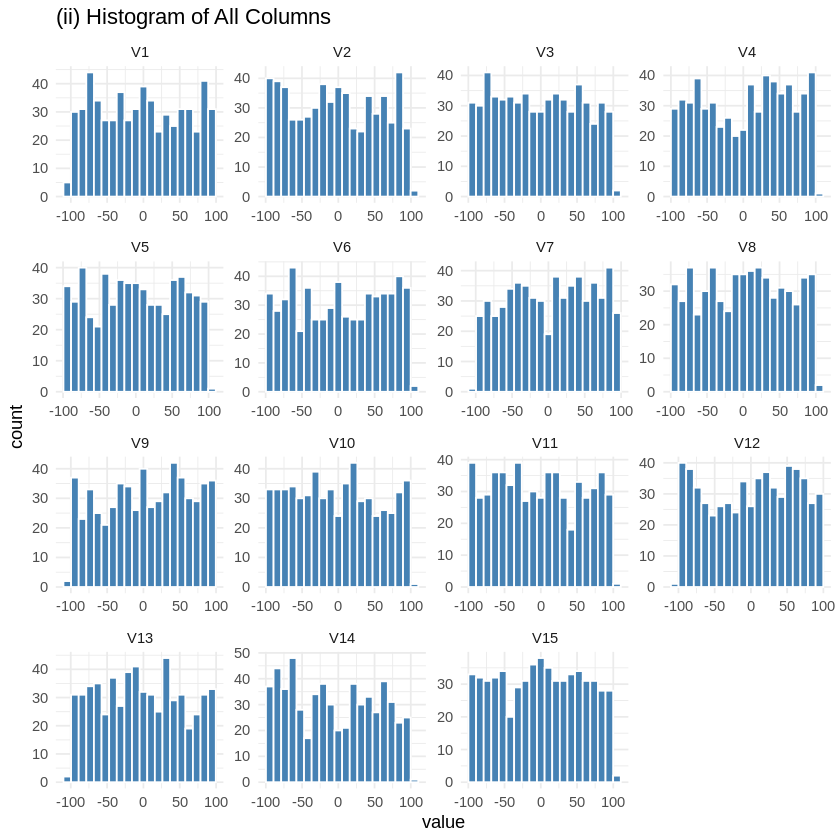

In [ ]:
# (ii)
# Melt data for ggplot
df_melt <- melt(df)

# Plot histogram with facets
ggplot(df_melt, aes(x = value)) +
  geom_histogram(bins = 20, fill = "steelblue", color = "white") +
  facet_wrap(~ variable, scales = "free") +
  labs(title = "(ii) Histogram of All Columns") +
  theme_minimal()


# Box Plot of all columns in one graph

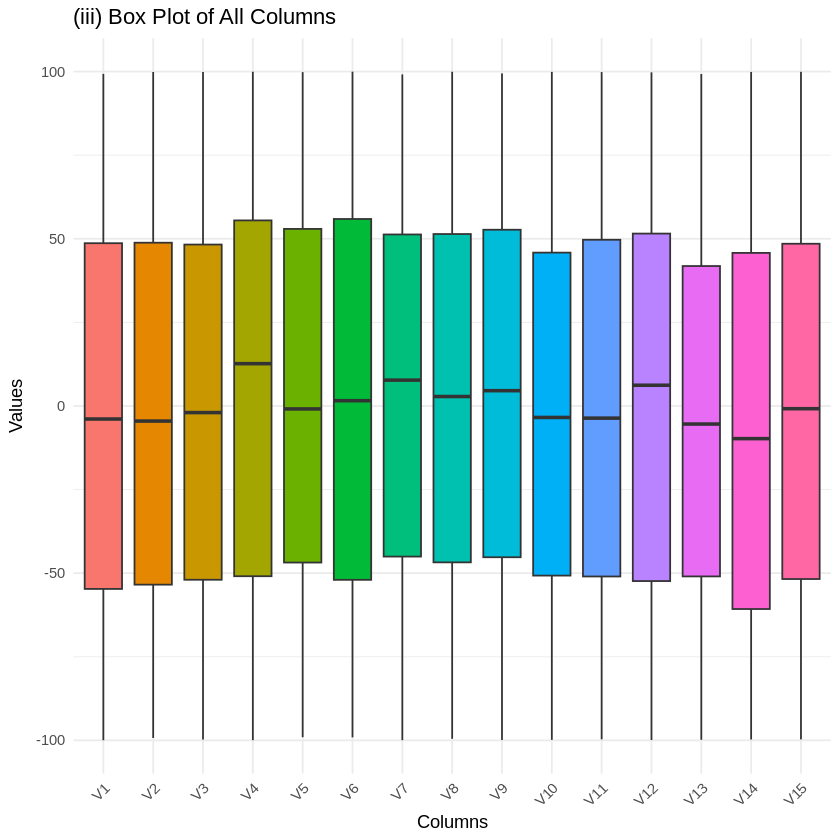

In [ ]:
# (iii)

ggplot(df_melt, aes(x = variable, y = value, fill = variable)) +
  geom_boxplot() +
  labs(title = "(iii) Box Plot of All Columns", x = "Columns", y = "Values") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  guides(fill = "none")
  # Remove legend


## Q4 Create a random dataset of 500 rows and 5 columns:
## All the values are defined between [5,10].
##Perform the following operations:
##(i) Perform t-Test on each column.
##(ii) Perform Wilcoxon Signed Rank Test on each column.
## (iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [ ]:
set.seed(123)
df <- as.data.frame(matrix(runif(500 * 5, min = 5, max = 10), nrow = 500))
colnames(df) <- paste0("V", 1:5)  # Optional: Rename columns to V1, V2, ...

# (i) One-Sample t-Test on each column (H0: mean = 7.5)
cat("(i) One-sample t-tests (H0: mean = 7.5):\n")
for (col in colnames(df)) {
  t_test_result <- t.test(df[[col]], mu = 7.5)
  cat(paste(" -", col, ": p-value =", round(t_test_result$p.value, 4), "\n"))
}


(i) One-sample t-tests (H0: mean = 7.5):
 - V1 : p-value = 0.711 
 - V2 : p-value = 0.9554 
 - V3 : p-value = 0.6299 
 - V4 : p-value = 0.8391 
 - V5 : p-value = 0.4886 


# Wilcoxon Signed-Rank Tes

In [1]:
# (ii) Wilcoxon Signed-Rank Test on each column (H0: median = 7.5)
cat("\n(ii) Wilcoxon Signed-Rank Tests (H0: median = 7.5):\n")
for (col in colnames(df)) {
  wilcox_result <- wilcox.test(df[[col]], mu = 7.5)
  cat(paste(" -", col, ": p-value =", round(wilcox_result$p.value, 4), "\n"))
}



(ii) Wilcoxon Signed-Rank Tests (H0: median = 7.5):


# Two-Sample t-Test and Wilcoxon Rank Sum Test

In [3]:
set.seed(123)
df <- as.data.frame(matrix(runif(500 * 5, min = 5, max = 10), nrow = 500))
colnames(df) <- paste0("V", 1:5)

cat("\n(iii) Two-sample tests between Column 3 (V3) and Column 4 (V4):\n")

# Two-sample t-test (assuming equal variances for simplicity)
t_test_two <- t.test(df$V3, df$V4)
cat(" - Two-sample t-Test: p-value =", round(t_test_two$p.value, 4), "\n")

# Wilcoxon Rank Sum Test (Mann–Whitney U test)
wilcox_two <- wilcox.test(df$V3, df$V4)
cat(" - Wilcoxon Rank Sum Test: p-value =", round(wilcox_two$p.value, 4), "\n")


(iii) Two-sample tests between Column 3 (V3) and Column 4 (V4):
 - Two-sample t-Test: p-value = 0.6293 
 - Wilcoxon Rank Sum Test: p-value = 0.6197 
